DE35: 7.186 +/- 0.557
DE45: 7.142 +/- 0.601
DE65: 4.703 +/- 0.461
DEY4: 36.935 +/- 1.365
DEZ4: 7.881 +/- 0.624
DGX9: 2.002 +/- 0.287
DHK4: 5.823 +/- 0.516
DJA4: 8.853 +/- 0.659
DJF5: 28.314 +/- 1.071
DJY3: 5.152 +/- 0.513
DL82: 3.941 +/- 0.423
DLT3: 218.467 +/- 3.648


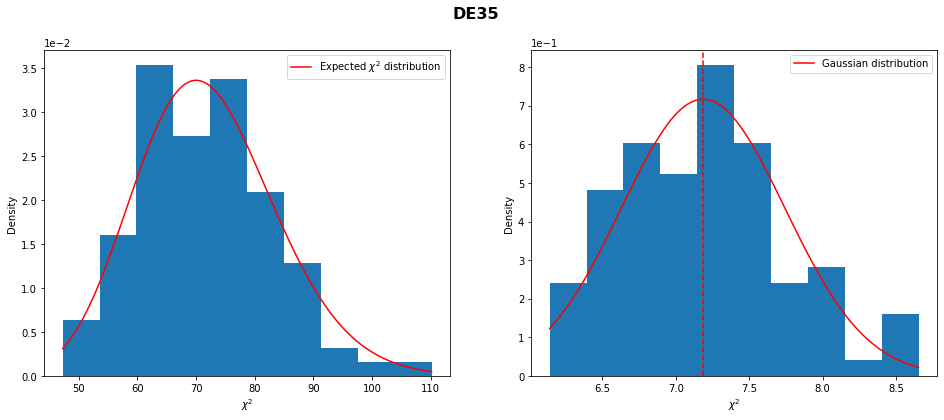

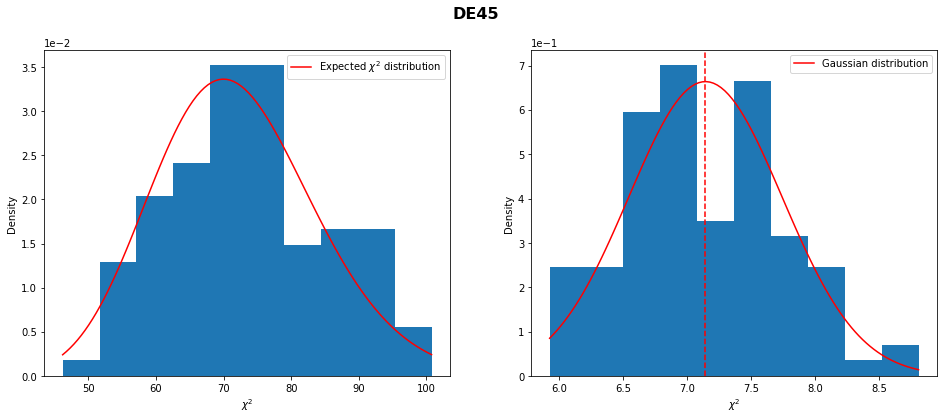

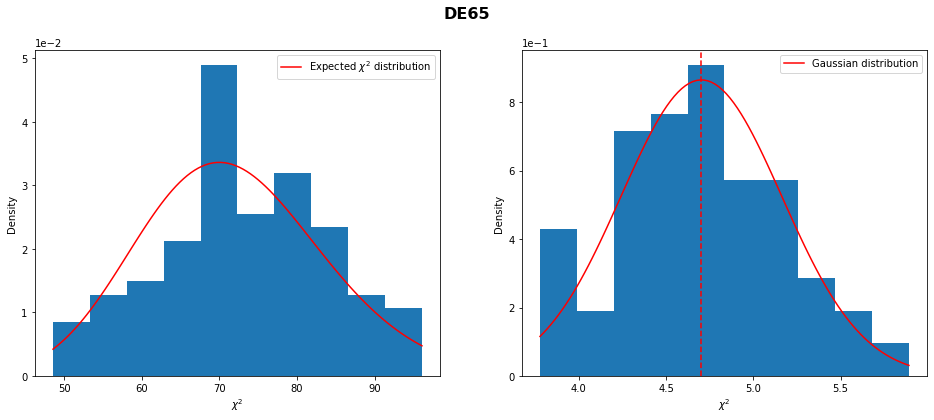

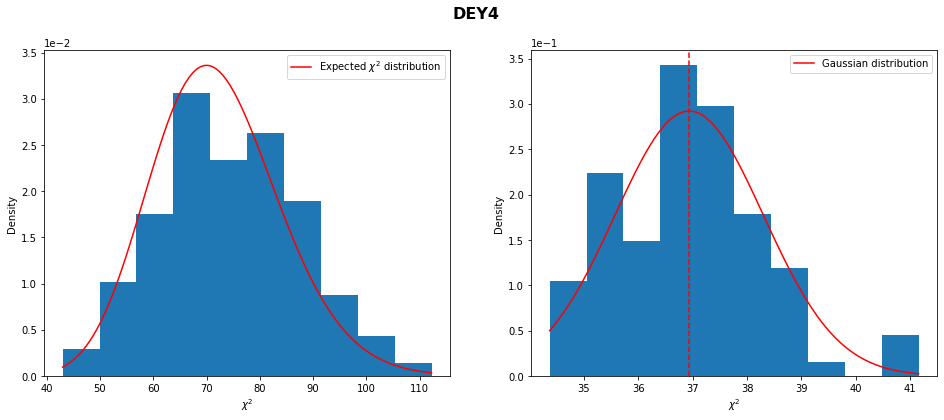

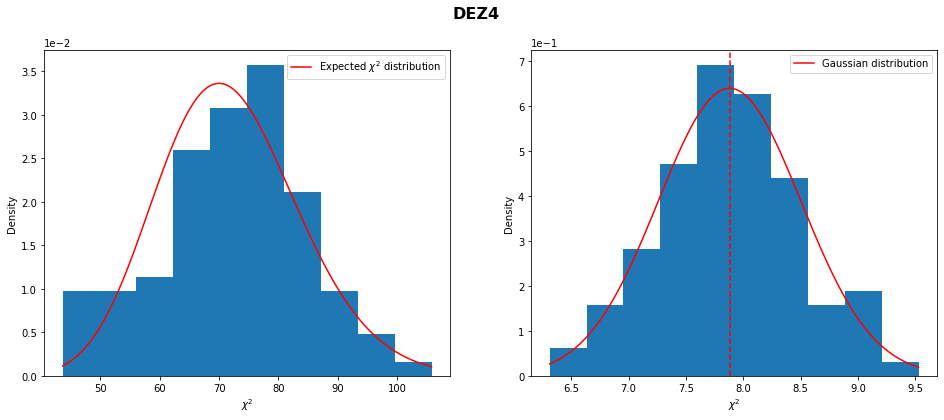

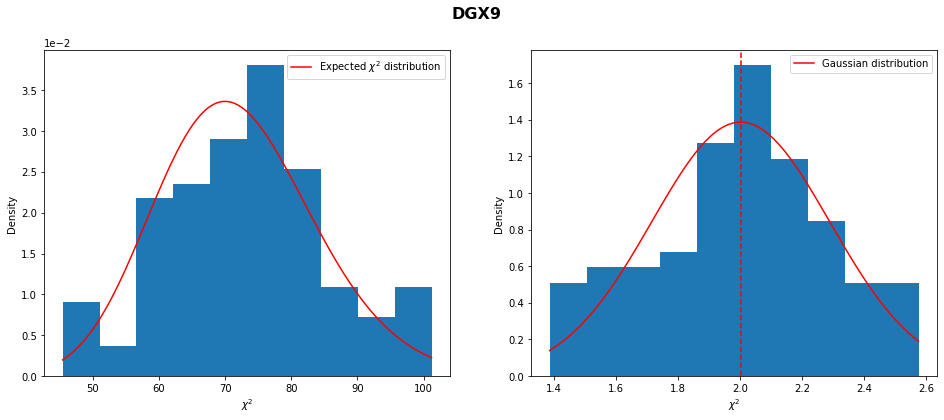

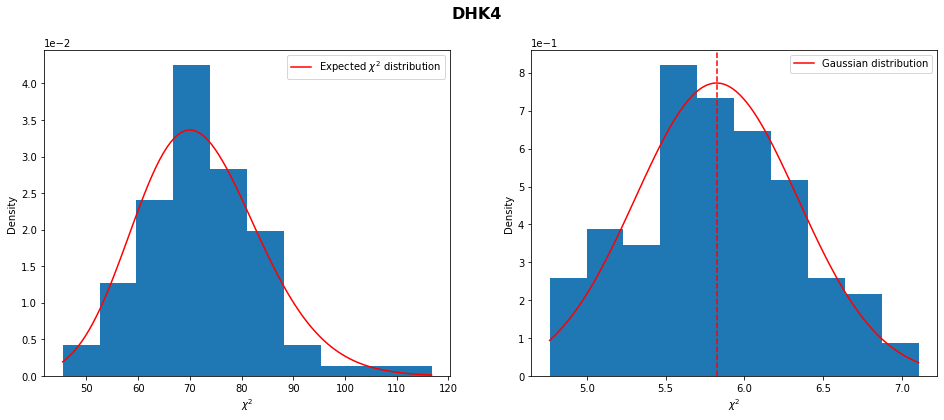

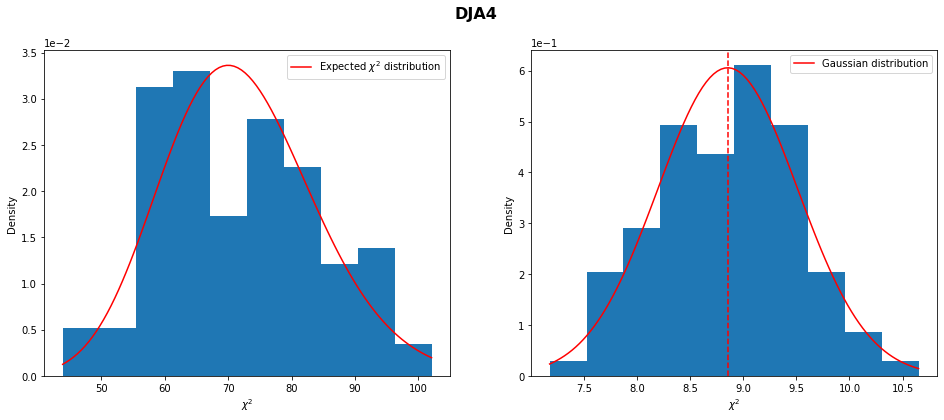

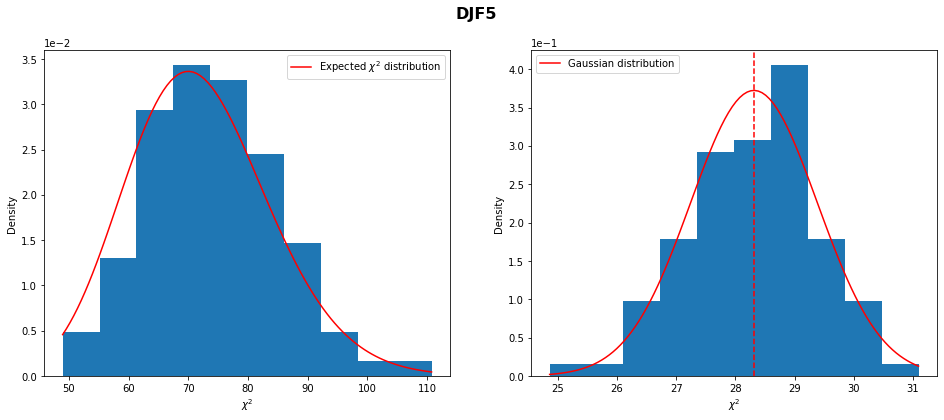

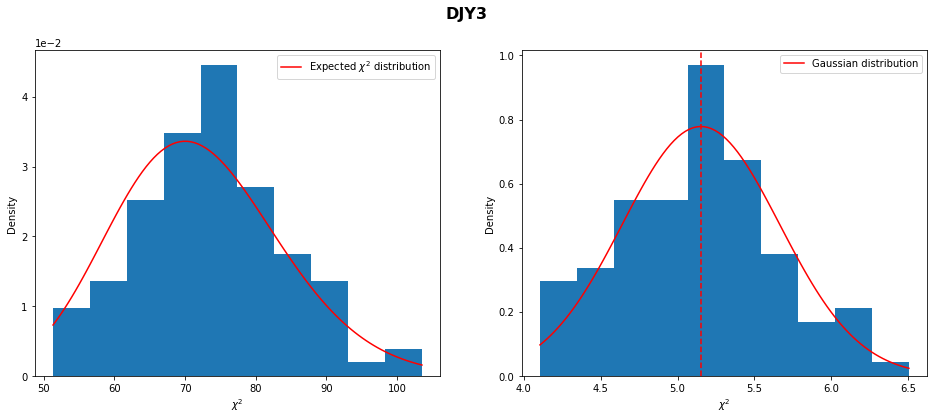

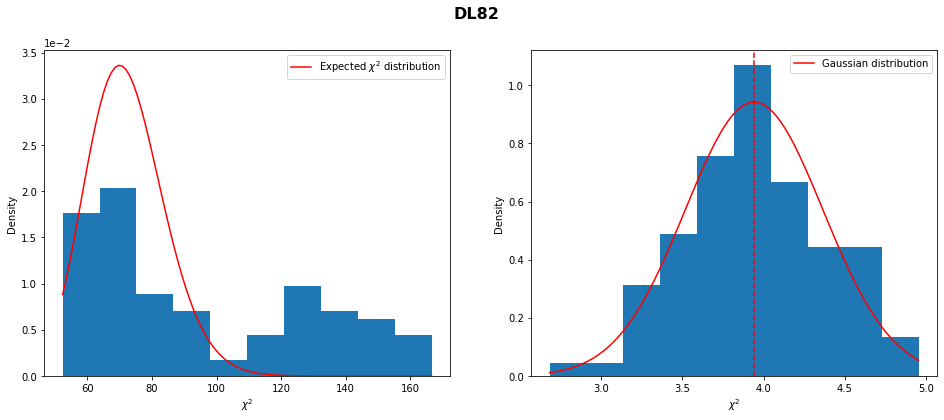

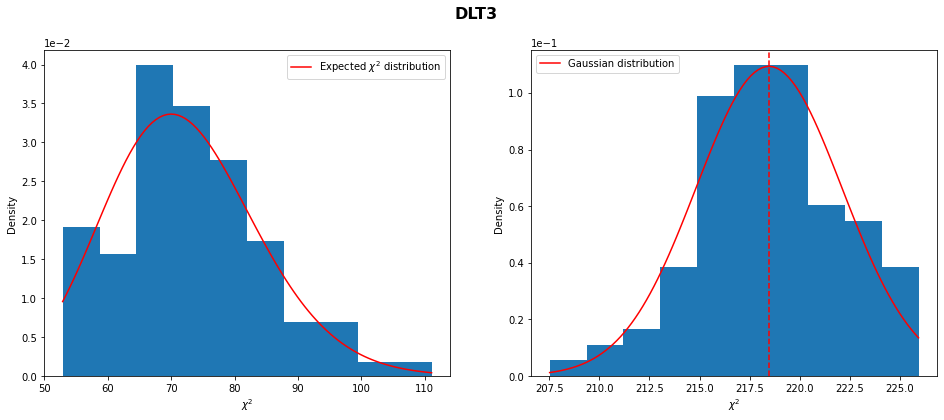

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm
from scipy.optimize import curve_fit

titles = ["DE35", "DE45", "DE65", "DEY4", "DEZ4", "DGX9", "DHK4", "DJA4", "DJF5", "DJY3", "DL82", "DLT3"]
files = ["../figures/fit_consistency2/SAS" + name + "_10/SAS" + name + "/out.txt" for name in titles]

for file, name in zip(files, titles):
    data = np.loadtxt(file, skiprows=2)
    ddof = data[:, 0]
    dchi2_struct = data[:, 1]
    dchi2_map = data[:, 2]
    dcutoff = data[:, 2]

    ### plot chi2_struct ###
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    plt.suptitle(name, fontsize=16, fontweight="bold")
    plt.sca(ax[0])
    n, bins, _ = plt.hist(dchi2_struct, bins=10, density=True)
    plt.xlabel("$\chi^2$")
    plt.ylabel("Density")
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    ### plot chi2 distribution ###
    # check if all ddof are identical
    if not np.all(ddof == ddof[0]):
        print("Warning: number of degrees of freedom are not identical for each measurement.")

    x = np.linspace(bins[0], bins[-1], 100)
    plt.plot(x, chi2.pdf(x, df=ddof[0]), "r-", label="Expected $\chi^2$ distribution")

    # fit chi2
    popt, _ = curve_fit(lambda x, df: chi2.pdf(x, df=df), bins[:-1], n)
    plt.plot(chi2.pdf(x, ddof=popt[0]), "r--", label="Fitted $\chi^2$ distribution")

    plt.legend()

    ### plot chi2_map ###
    plt.sca(ax[1])
    dchi2_map = dchi2_map/ddof[0]
    n, bins, _ = plt.hist(dchi2_map, bins=10, density=True)
    plt.xlabel("$\chi^2$")
    plt.ylabel("Density")
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    ### plot gaussian distribution ###
    x = np.linspace(bins[0], bins[-1], 100)
    mean = np.mean(dchi2_map)
    plt.plot(x, norm.pdf(x, loc=mean, scale=np.std(dchi2_map)), "r-", label="Gaussian distribution")
    plt.axvline(mean, color="r", linestyle="--")
    plt.legend()
    print(f"{name}: {mean:.3f} +/- {np.std(dchi2_map):.3f}")

    plt.savefig("../figures/fit_consistency2/SAS" + name + "_10/SAS" + name + "/fig.png")
plt.show()